In [17]:
import pandas as pd
import numpy as np
import numpy
import matplotlib.pyplot as plt
numpy.set_printoptions(threshold=numpy.nan)

In [18]:
mat = pd.read_csv('ex5data1.data', header=None)

In [19]:
from math import sqrt
 
def euclidian(v1,v2):
    dist = 0.0
    for x in range(len(v1)):
        dist += pow((v1[x] - v2[x]),2)
 
    #Tira a raiz quadrada da soma
    eucli = sqrt(dist)
    return eucli

In [20]:
from sklearn import preprocessing
X =  np.array(mat.iloc[ : , : -1].values)
X_normalized = preprocessing.normalize(X, norm='l2')
y = np.array(mat.iloc[ : , -1].values)

In [21]:
#Precisamos do modulo random
import random
 
def Kcluster(data,distance=euclidian,k=3):
    #Determina o valor máximo e mínimo para cada atributo
    #Cria uma lista de tuplas que contem valores máximos e mínimos de cada atributo
    ranges = [(min([row[i] for row in data]),
               max([row[i] for row in data]))
               for i in range(len(data[0]))]
 
   #Cria K centroides aleatórias
   #Cria uma lista contendo os K centroides em posições aleatorias.
   #No nosso caso serão 3
    clusters=[[random.random()*(ranges[i][1] - ranges[i][0])+ranges[i][0]
               for i in range(len(data[0]))] for j in range(k)]
    clus = random.randrange(1,100)
    clusters = data[clus : clus+k]
    lastmatches = None
 
    #O número de iterações será no máximo 100
    for t in range(100):
        bestmatches = [[] for i in range(k)] #Cria uma lista contendo 3 lista vazias
 
        #Verifica qual centroide esta mais perto de cada instância
        for j in range(len(data)):
            row=data[j]
            bestmatch = 0 #Aqui armazeno o índice da menor distância para comparação
            for i in range(k):
                d = distance(clusters[i],row) #Calcula a distancia em relação ao centroide
                if d < distance(clusters[bestmatch],row): 
                    #Aqui vejo se é a menor distância  
                    bestmatch = i   
            bestmatches[bestmatch].append(j) 
            #Aqui coloco a instância no seu cluster                 
            
        #Se o resultado for o mesmo que da ultima vez esta completo         
        if bestmatches == lastmatches: break         
            
        lastmatches=bestmatches          
        
        #Move o centroide para a zona média do cluster        
        #no caso recalculamos as distancias em relação as instâncias e movemo para aquele ponto         
        # em que teremos a menor média para as distâncias.         
        for i in range(k):             
            avgs=[0.0]*len(data[0]) 
            #Cria a lista de médias             
            if len(bestmatches[i]) > 0:
                for rowid in bestmatches[i]:
                    for m in range(len(data[rowid])):
                        avgs[m] += data[rowid][m]
                for j in range(len(avgs)):
                    avgs[j] /= len(bestmatches[i])
                clusters[i]=avgs

    print("Iterações: "+str(t))
    return bestmatches, clusters
    

In [22]:
def plotErro(erros):
    print(erros)
    y = erros
    x = [2,3,4,5]
    #x = [2,3,4,5,6,7,8,9,10]
    plt.plot(x,y)
    plt.show()

In [23]:
def plotando(clusters):
    #a liste de valores que serão plotados
    plots = clusters

    fig = plt.figure(236)
    x = 0
    y = 1

    #Os títulos de cada gráfico
    titles = ['sepal length x sepal width','sepal length x petal length',
              'sepal length x petal width','sepal width x petal length',
              'sepal width x petal width','petal length x petal width']

    #Aqui trato de gerar todos os gráficos.
    for h in range(1,7):
        fig.add_subplot(2,3,h)
        for plot,color in zip(plots,['r','b','g','y','k']):
            plt.scatter(plot[:,x],plot[:,y],c=color, alpha=0.7)
        if y < 3:         
            y += 1     
        elif y >= 3:
            x += 1
            y = x + 1
        plt.title(titles[h - 1])
        plt.xticks(())
        plt.yticks(())
    plt.show()

Iterações: 2


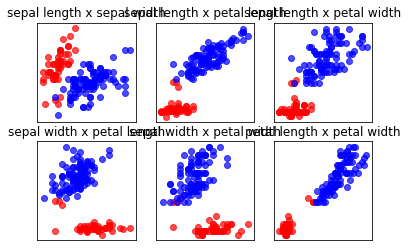

Iterações: 12


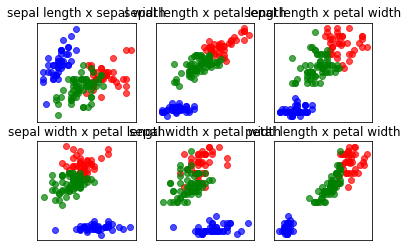

Iterações: 13


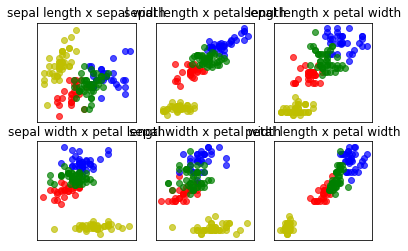

Iterações: 6


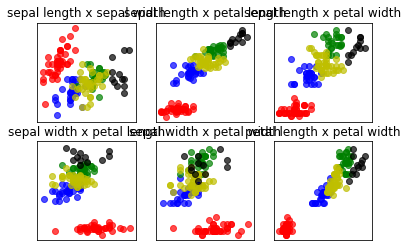

[0.7783868079886385, 0.626594567718414, 0.5377193095702342, 0.4770431317261862]


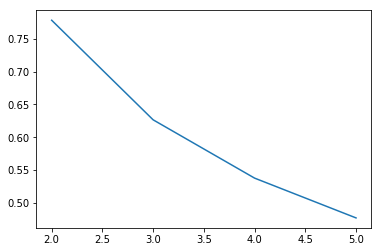

In [24]:
clusterErros = []
for i in range(2,6):
    cluster, erros = Kcluster(X, k=i)
    classes = [ [] for i in range(len(cluster))]
    for groups in range(len(cluster)):
        classes[groups] = X[[cluster[groups]]]
    
    plotando(classes)   
    dists = [ 0 for i in range(len(classes))]
    for index in range(len(classes)):
        for j in range(len(classes[index])):
            dists[index] = dists[index] + euclidian(classes[index][j], erros[index])
        dists[index] /= len(classes[index])
    totalDist = 0
    for medidaDist in range(len(dists)):
        totalDist += dists[medidaDist]
    totalDist = totalDist / len(dists)
    clusterErros.append(totalDist)
plotErro(clusterErros)